WeatherPy

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import ttest_ind

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units_m='metric'
query_url = f'{url}appid={api_key}&units={units_m}&q=' 
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=cdd7a07ad4fba71c3b27dde5fb074f7d&units=metric&q=


In [7]:
data = requests.get(query_url+cities[0]).json()
print(json.dumps(data,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 71.97,
        "lon": 114.09
    },
    "dt": 1570232760,
    "id": 2017155,
    "main": {
        "grnd_level": 999.61,
        "humidity": 87,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": -10.51,
        "temp_max": -10.51,
        "temp_min": -10.51
    },
    "name": "Saskylakh",
    "sys": {
        "country": "RU",
        "message": 0.0081,
        "sunrise": 1570229825,
        "sunset": 1570267634
    },
    "timezone": 32400,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 147.627,
        "speed": 2.51
    }
}


In [8]:
city_list=[]
lat = []
lng = []
m_temp=[]
humid=[]
cloud=[]
wind_sp=[]
country=[]
date=[]
counter = 0

for city in cities:
    try:
        data = requests.get(query_url+city).json()
        counter += 1
        city_list.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        m_temp.append(data['main']['temp_max'])
        humid.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind_sp.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        print(f'Processing record {counter} | {city}')
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete.')     
print('-----------------------------')

Processing record 1 | saskylakh
Processing record 2 | rikitea
Processing record 3 | ushuaia
Processing record 4 | bethel
Processing record 5 | punta arenas
City not found. Skipping...
Processing record 7 | busselton
Processing record 8 | streator
Processing record 9 | ende
Processing record 10 | trelew
Processing record 11 | vao
City not found. Skipping...
Processing record 13 | puerto ayora
Processing record 14 | tasiilaq
Processing record 15 | ujhani
Processing record 16 | richmond
Processing record 17 | lebu
Processing record 18 | rongcheng
Processing record 19 | nikolskoye
Processing record 20 | ca mau
Processing record 21 | hilo
Processing record 22 | san quintin
Processing record 23 | torbay
Processing record 24 | yangjiang
Processing record 25 | mataura
Processing record 26 | albany
Processing record 27 | grindavik
Processing record 28 | yulara
Processing record 29 | lavrentiya
Processing record 30 | lloydminster
Processing record 31 | tuatapere
Processing record 32 | olinda
Pro

Processing record 253 | ahuimanu
Processing record 254 | hofn
Processing record 255 | lodwar
Processing record 256 | puerto baquerizo moreno
Processing record 257 | sao filipe
Processing record 258 | eyl
Processing record 259 | souillac
Processing record 260 | prabumulih
Processing record 261 | east london
City not found. Skipping...
Processing record 263 | west wendover
Processing record 264 | kieta
Processing record 265 | hami
Processing record 266 | katsuura
Processing record 267 | markova
Processing record 268 | lufilufi
City not found. Skipping...
Processing record 270 | kavaratti
Processing record 271 | lagoa
City not found. Skipping...
Processing record 273 | kuching
Processing record 274 | sompeta
Processing record 275 | maragogi
Processing record 276 | sesimbra
Processing record 277 | popondetta
Processing record 278 | belen
Processing record 279 | mount isa
Processing record 280 | tecoanapa
City not found. Skipping...
Processing record 282 | nanortalik
Processing record 283 |

Processing record 503 | bilibino
Processing record 504 | cottbus
Processing record 505 | hazleton
Processing record 506 | tabou
Processing record 507 | parrita
Processing record 508 | luau
Processing record 509 | san vicente
Processing record 510 | warri
Processing record 511 | ashland
Processing record 512 | billings
Processing record 513 | port lincoln
Processing record 514 | prince albert
Processing record 515 | caravelas
Processing record 516 | adre
Processing record 517 | batagay-alyta
Processing record 518 | kloulklubed
Processing record 519 | san pedro
Processing record 520 | sandy bay
Processing record 521 | obera
Processing record 522 | logansport
Processing record 523 | mocorito
Processing record 524 | college
Processing record 525 | lumeje
Processing record 526 | lubango
Processing record 527 | pizarro
City not found. Skipping...
Processing record 529 | rafai
Processing record 530 | cabo san lucas
Processing record 531 | waitati
Processing record 532 | socorro
Processing rec

In [9]:
len(lat),len(humid),len(cloud),len(wind_sp),len(m_temp),len(city_list)

(535, 535, 535, 535, 535, 535)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
df = pd.DataFrame({'City':city_list,'Cloudiness':cloud,'Country':country,'Date':date,'Humidity':humid,'Lat':lat,
                   'Lng':lng,'Max Temp':m_temp,'Wind Speed':wind_sp})
df.to_csv('Output/city_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
City          535 non-null object
Cloudiness    535 non-null int64
Country       535 non-null object
Date          535 non-null int64
Humidity      535 non-null int64
Lat           535 non-null float64
Lng           535 non-null float64
Max Temp      535 non-null float64
Wind Speed    535 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 33.5+ KB


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [11]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,0,RU,1570232760,87,71.97,114.09,-10.51,2.51
1,Rikitea,100,PF,1570232763,78,-23.12,-134.97,21.21,9.40
2,Ushuaia,40,AR,1570232763,89,-54.81,-68.31,3.00,12.90
3,Bethel,90,US,1570232336,81,60.79,-161.76,7.00,6.70
4,Punta Arenas,20,CL,1570232763,48,-53.16,-70.91,5.00,8.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [64]:
# Identify the correlation coefficients by positive and negative latitudes.
from scipy.stats import pearsonr
lat_neg = df.loc[df['Lat'] < 0,:]
lat_pos = df.loc[df['Lat'] > 0,:]
corr_pos_temp, _ = pearsonr(lat_pos['Lat'],lat_pos['Max Temp'])
corr_neg_temp, _ = pearsonr(lat_neg['Lat'],lat_neg['Max Temp'])
corr_pos_hum, _ = pearsonr(lat_pos['Lat'],lat_pos['Humidity'])
corr_neg_hum, _ = pearsonr(lat_neg['Lat'],lat_neg['Humidity'])
corr_pos_cld, _ = pearsonr(lat_pos['Lat'],lat_pos['Cloudiness'])
corr_neg_cld, _ = pearsonr(lat_neg['Lat'],lat_neg['Cloudiness'])
corr_pos_wnsp, _ = pearsonr(lat_pos['Lat'],lat_pos['Wind Speed'])
corr_neg_wnsp, _ = pearsonr(lat_neg['Lat'],lat_neg['Wind Speed'])

# Convert results into a DataFrame.
factors = ['Max Temperature','Humidity','Cloudiness','Wind Speed']
corr_pos = [corr_pos_temp,corr_pos_hum,corr_pos_cld,corr_pos_wnsp]
corr_neg = [corr_neg_temp,corr_neg_hum,corr_neg_cld,corr_neg_wnsp]

corr_df = pd.DataFrame({'Correlation Coefficient vs Latitude':factors,'Northern Hemisphere':corr_pos,'Southern Hemisphere':corr_neg})
corr_df['Conclusion']=''
for index,row in corr_df.iterrows():
    if row['Northern Hemisphere'] < -.7 and row['Southern Hemisphere']>.7:
        corr_df.loc[index, 'Conclusion'] = 'True'
    else:
        corr_df.loc[index,'Conclusion'] = 'False'

corr_df.to_csv('Output/correlcoeff.csv')
corr_df

,Correlation Coefficient vs Latitude,Northern Hemisphere,Southern Hemisphere,Conclusion
0,Max Temperature,-0.836819,0.736165,True
1,Humidity,-0.060299,0.150956,False
2,Cloudiness,0.153858,0.163218,False
3,Wind Speed,0.339399,-0.185526,False


In [111]:
# Checking the P Values to make sure the data shows statistical signficance.
(t_stat, p1_pos) = ttest_ind(lat_pos['Lat'],lat_pos['Max Temp'],equal_var=False)
(t_stat, p1_neg) = ttest_ind(lat_neg['Lat'],lat_neg['Max Temp'],equal_var=False)

(t_stat, p2_pos) = ttest_ind(lat_pos['Lat'],lat_pos['Humidity'],equal_var=False)
(t_stat, p2_neg) = ttest_ind(lat_neg['Lat'],lat_neg['Humidity'],equal_var=False)

(t_stat, p3_pos) = ttest_ind(lat_pos['Lat'],lat_pos['Cloudiness'],equal_var=False)
(t_stat, p3_neg) = ttest_ind(lat_neg['Lat'],lat_neg['Cloudiness'],equal_var=False)

(t_stat, p4_pos) = ttest_ind(lat_pos['Lat'],lat_pos['Wind Speed'],equal_var=False)
(t_stat, p4_neg) = ttest_ind(lat_neg['Lat'],lat_neg['Wind Speed'],equal_var=False)

p1_pos, p1_neg, p2_pos, p2_neg, p3_pos, p3_neg, p4_pos, p4_neg

(2.824205533197293e-50,
 5.530661667869052e-94,
 7.499053964747838e-98,
 1.4284479977506051e-134,
 2.8407508845752866e-10,
 3.312178586427245e-56,
 8.196669043274279e-101,
 1.346886277979912e-55)

#### Latitude vs. Temperature Plot

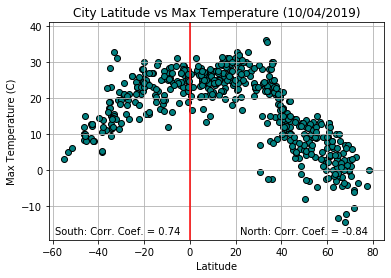

In [96]:
yminlim = min(df['Max Temp'])-5
ymaxlim = max(df['Max Temp'])+5
plt.scatter(df['Lat'],df['Max Temp'],facecolor='teal',edgecolors='black')
plt.title('City Latitude vs Max Temperature (10/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.ylim(yminlim,ymaxlim)
plt.grid(b=True)
plt.vlines(0,ymin=yminlim,ymax=ymaxlim,colors='r')
plt.text(-59,-18,'South: Corr. Coef. = 0.74')
plt.text(22,-18,'North: Corr. Coef. = -0.84')
plt.savefig('Output/lat_mtemp.png')
plt.show()

#### Latitude vs. Humidity Plot

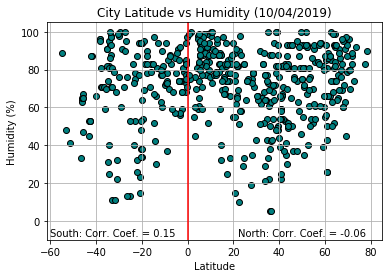

In [102]:
yminlim = min(df['Humidity'])-15
ymaxlim = max(df['Humidity'])+5
plt.scatter(df['Lat'],df['Humidity'],facecolor='teal',edgecolors='black')
plt.title('City Latitude vs Humidity (10/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(yminlim,ymaxlim)
plt.grid(b=True)
plt.vlines(0,ymin=yminlim,ymax=ymaxlim,colors='r')
plt.text(-60,-8,'South: Corr. Coef. = 0.15')
plt.text(22,-8,'North: Corr. Coef. = -0.06')
plt.savefig('Output/lat_humid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

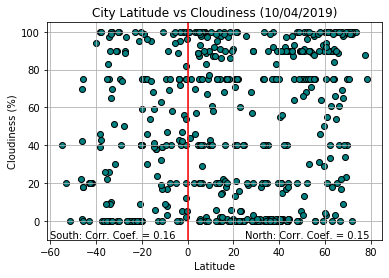

In [85]:
yminlim = min(df['Cloudiness'])-10
ymaxlim = max(df['Cloudiness'])+5
plt.scatter(df['Lat'],df['Cloudiness'],facecolor='teal',edgecolors='black')
plt.title('City Latitude vs Cloudiness (10/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(yminlim,ymaxlim)
plt.grid(b=True)
plt.vlines(0,ymin=yminlim,ymax=ymaxlim,colors='r')
plt.text(-60,-9,'South: Corr. Coef. = 0.16')
plt.text(25,-9,'North: Corr. Coef. = 0.15')
plt.savefig('Output/lat_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

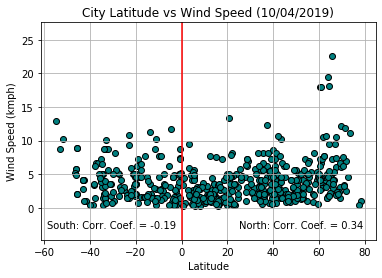

In [97]:
yminlim = min(df['Wind Speed'])-5
ymaxlim = max(df['Wind Speed'])+5
plt.scatter(df['Lat'],df['Wind Speed'],facecolor='teal',edgecolors='black')
plt.title('City Latitude vs Wind Speed (10/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kmph)')
plt.ylim(yminlim,ymaxlim)
plt.grid(b=True)
plt.vlines(0,ymin=yminlim,ymax=ymaxlim,colors='r')
plt.text(-59,-3,'South: Corr. Coef. = -0.19')
plt.text(25,-3,'North: Corr. Coef. = 0.34')
plt.savefig('Output/lat_windspeed.png')
plt.show()